# Project_Notes_009

## Apex Trust Bank Credit Risk Assessment
In this project, a data with 2542 rows and 20 columns will be used to to enhance the credit risk assessment process of Apex Trust Bank to reduce the number of bad loans. The data will be reconfigured by converting the numerical values to strings before exploring to capture the trends. The model will then be developed by utilising logistic regression which will be evaluated with grid search cv to obtain the best performance, the feature importances and confusion matrix will also be produced.

In [1]:
# Surpress Warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import required modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
# Import the data.
df = pd.read_csv('data\Project_Notes_009_Apex_Trust_Bank.csv')

print(f'{df.shape}\n')
df.head()

(2542, 20)



,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,4,76,3,9,325,4,3,2,3,2,4,53,3,3,1,2,1,1,1,0
1,4,65,2,6,4825,2,4,3,2,4,3,82,2,3,4,1,1,2,0,0
2,2,87,1,0,3300,1,4,2,1,4,1,52,2,2,4,4,1,1,0,0
3,2,67,2,1,9575,2,3,3,3,1,4,44,1,2,2,2,2,2,1,0
4,1,96,4,3,5525,1,1,3,3,4,3,23,2,3,4,2,1,1,0,0


In [3]:
# Check the info of df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   2542 non-null   int64
 1   duration                 2542 non-null   int64
 2   credit_history           2542 non-null   int64
 3   purpose                  2542 non-null   int64
 4   amount                   2542 non-null   int64
 5   savings                  2542 non-null   int64
 6   employment_duration      2542 non-null   int64
 7   installment_rate         2542 non-null   int64
 8   other_debtors            2542 non-null   int64
 9   present_residence        2542 non-null   int64
 10  property                 2542 non-null   int64
 11  age                      2542 non-null   int64
 12  other_installment_plans  2542 non-null   int64
 13  housing                  2542 non-null   int64
 14  number_credits           2542 non-null   int64
 15  job 

#### Data Description

In [4]:
# Enumirate columns to be changed to strings.
obj_col = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate',
               'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 
               'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [5]:
# Change the required columns to string.
df[obj_col] = df[obj_col].astype('str')

In [6]:
# Check the info of df again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   2542 non-null   object
 1   duration                 2542 non-null   int64 
 2   credit_history           2542 non-null   object
 3   purpose                  2542 non-null   object
 4   amount                   2542 non-null   int64 
 5   savings                  2542 non-null   object
 6   employment_duration      2542 non-null   object
 7   installment_rate         2542 non-null   object
 8   other_debtors            2542 non-null   object
 9   present_residence        2542 non-null   object
 10  property                 2542 non-null   object
 11  age                      2542 non-null   int64 
 12  other_installment_plans  2542 non-null   object
 13  housing                  2542 non-null   object
 14  number_credits           2542 non-null  

In [7]:
# check for missing values.
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

#### Exploratory Data Analysis

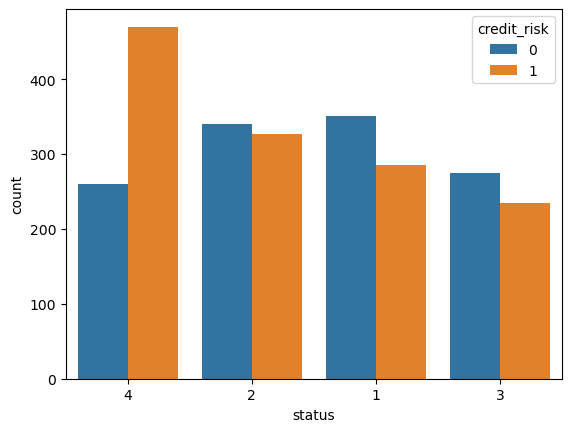

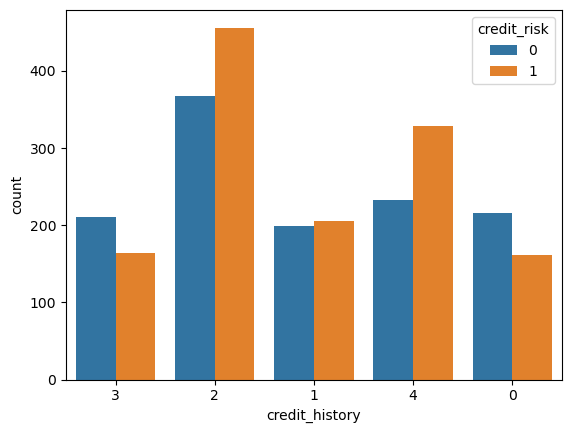

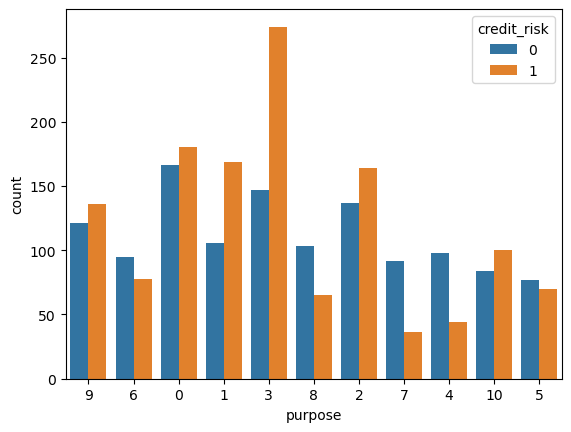

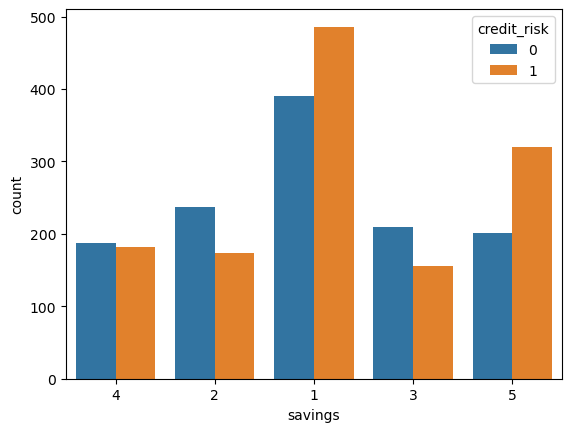

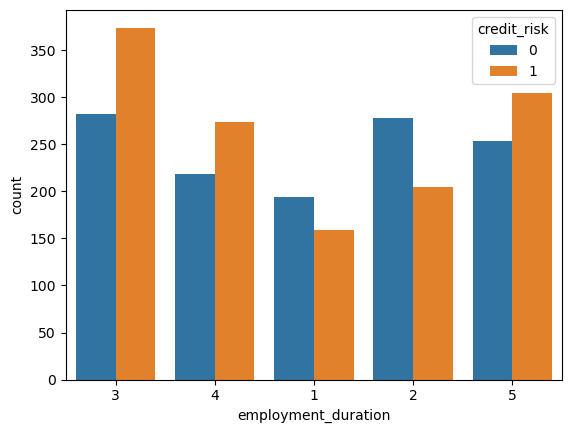

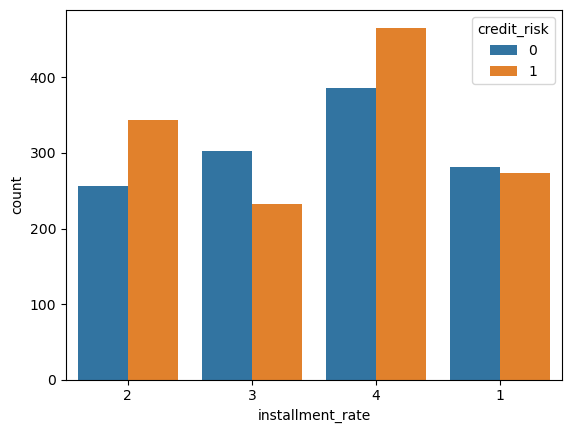

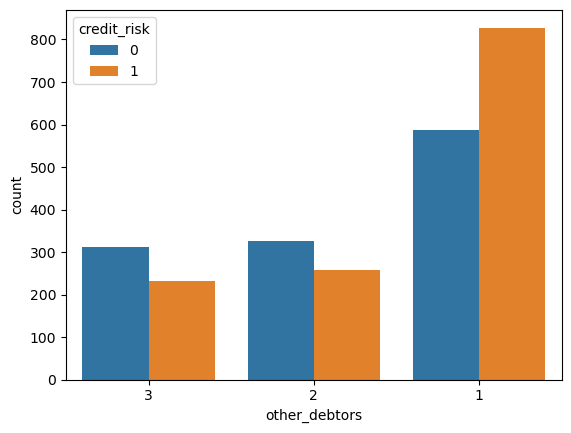

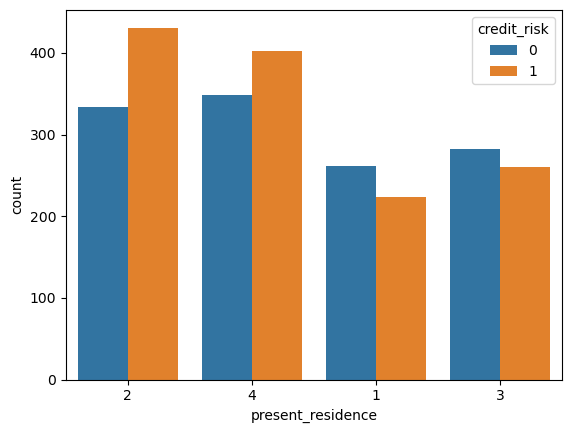

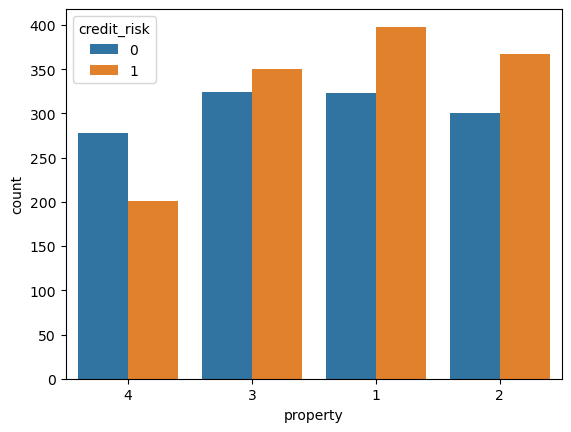

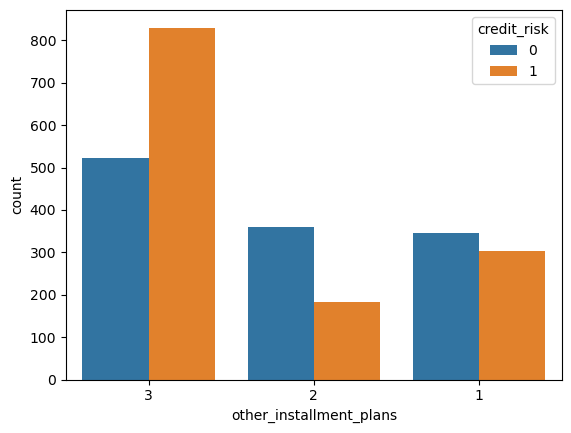

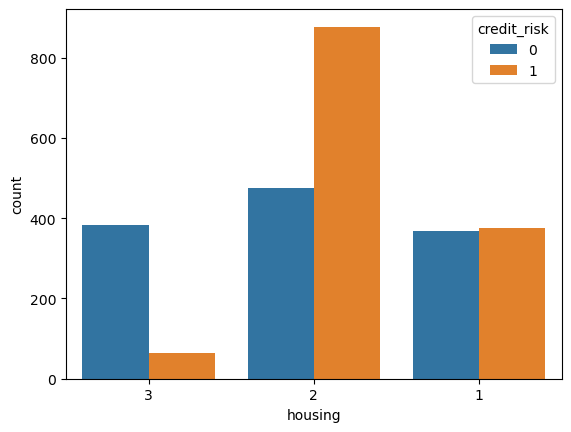

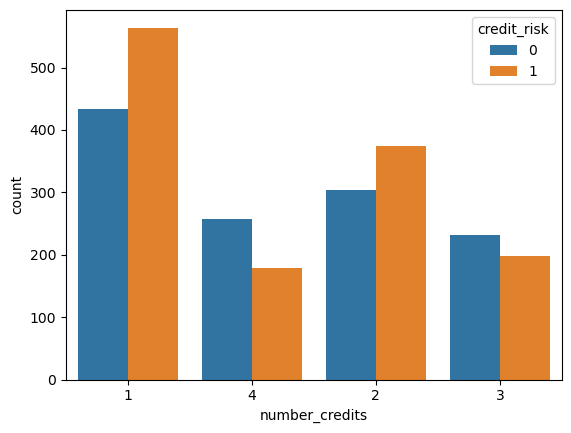

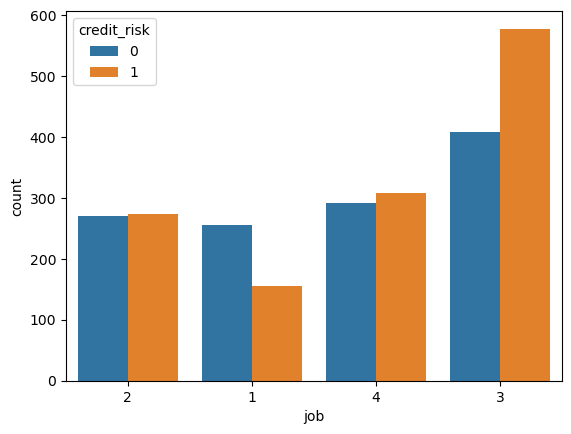

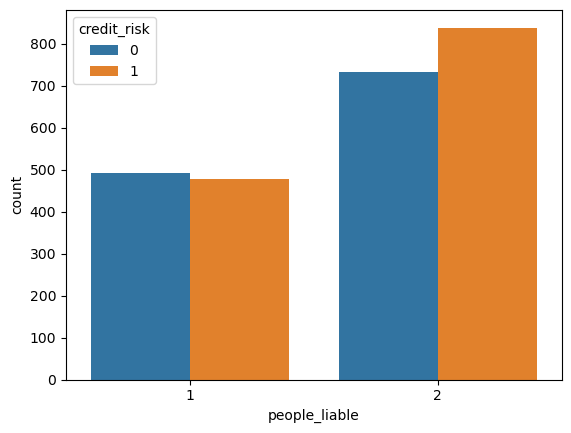

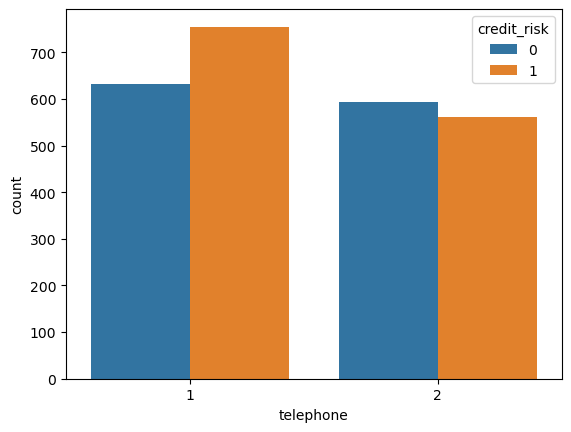

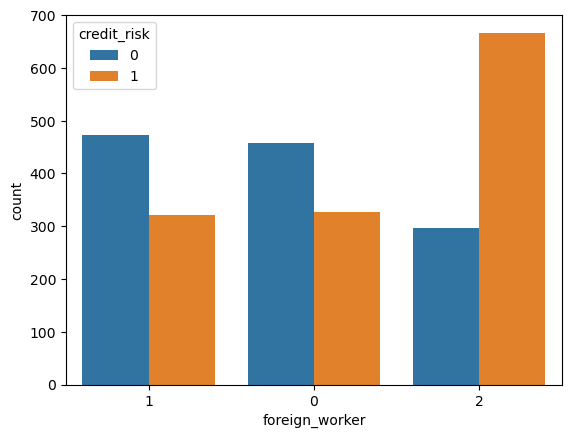

In [8]:
# Loop to plot the count of all the non numerical columns.
for column in obj_col[:-1]:
    sns.countplot(data=df, x=column, hue='credit_risk')
    plt.show();

#### Box Plots

In [9]:
# Select the numerical columns.
num_col = ['duration', 'amount', 'age']

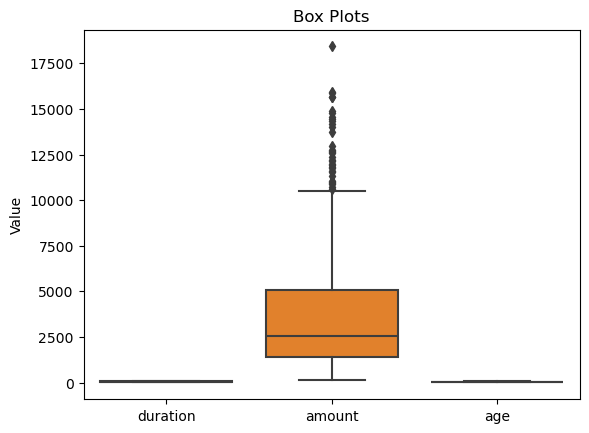

In [10]:
# Plot the boxplot of the numerical columns.
sns.boxplot(data=df[num_col])
plt.title('Box Plots')
plt.ylabel('Value')
plt.show()

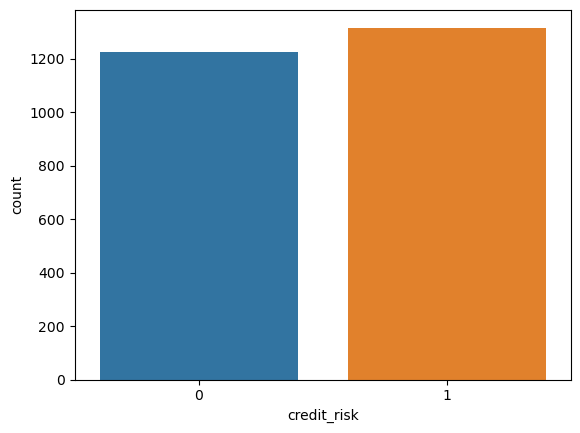

In [11]:
# Count plot of credit_risk.
ax = sns.countplot(data=df, x='credit_risk')
plt.show();

The bad (0) and good (1) values of credit_risk are almost balanced.

#### Correlation

In [12]:
# Check correlation of numerical columns.
corr = df.select_dtypes("number").corr()
corr

,duration,amount,age
duration,1.000000,0.124080,0.123948
amount,0.124080,1.000000,0.224996
age,0.123948,0.224996,1.000000


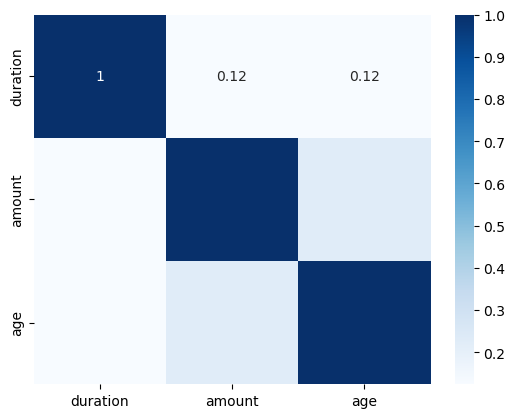

In [13]:
# Draw the correlation heatmap.
sns.heatmap(corr, cmap='Blues', annot=True);

The columns have low correlation.

#### Model Development

In [14]:
# Firstly, convert the datatype of credit_risk column to int64.
df['credit_risk'] = df['credit_risk'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   2542 non-null   object
 1   duration                 2542 non-null   int64 
 2   credit_history           2542 non-null   object
 3   purpose                  2542 non-null   object
 4   amount                   2542 non-null   int64 
 5   savings                  2542 non-null   object
 6   employment_duration      2542 non-null   object
 7   installment_rate         2542 non-null   object
 8   other_debtors            2542 non-null   object
 9   present_residence        2542 non-null   object
 10  property                 2542 non-null   object
 11  age                      2542 non-null   int64 
 12  other_installment_plans  2542 non-null   object
 13  housing                  2542 non-null   object
 14  number_credits           2542 non-null  

In [15]:
# Split dataset to train, test and validation sets.
df_use = df.copy()
y = df_use['credit_risk']
X = df_use.drop('credit_risk', axis=1)

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)

In [16]:
# Create the preprocessor.
numeric_features = ['duration', 'amount', 'age']

categorical_features = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate',
                        'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing',
                        'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

preprocessor = make_column_transformer(
                                        (StandardScaler(), numeric_features),
                                        (OrdinalEncoder(), categorical_features)
                                       )

In [17]:
# Train a logistic regression model.
lgr = make_pipeline(preprocessor, LogisticRegression())
lgr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'amount',
                                                   'age']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['status', 'credit_history',
                                                   'purpose', 'savings',
                                                   'employment_duration',
                                                   'installment_rate',
                                                   'other_debtors',
                                                   'present_residence',
                                                   'property',
                                                   'other_installment_plans',
                                                   'housing', 'number_credits',
                                                   'job', 'people_liable',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('logisticregression', LogisticRegression())])

In [18]:
# Calculate the accuracy_score of lgr.
pred_val_lgr = lgr.predict(X_val)
score_val_lgr = accuracy_score(y_val, pred_val_lgr)
print('score_val_lgr:', score_val_lgr.round(4))

score_val_lgr: 0.8035


In [19]:
# Use GridSearchCV to find the best hyperparameters.

params = {
            'logisticregression__penalty': ['l2'],
            'logisticregression__C': [0.5, 1, 10],
            'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs']
         }

gscv = GridSearchCV(
                    estimator=lgr,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1
                    )

gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'amount',
                                                                          'age']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['status',
                                                                          'credit_history',
                                                                          'purpose',
                                                                          'savings',
                                                                          'employment_duration',
                                                                          'installment_rate',
                                                                          'other_debtors',
                                                                          'present_residence',
                                                                          'property',
                                                                          'other_installment_plans',
                                                                          'housing',
                                                                          'number_credits',
                                                                          'job',
                                                                          'people_liable',
                                                                          'telephone',
                                                                          'foreign_worker'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.5, 1, 10],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['liblinear',
                                                        'newton-cg', 'lbfgs']})

In [20]:
# Get model best parameters.
gscv.best_params_

{'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [21]:
# Use the best parameters to fit the model.
lgr = make_pipeline(preprocessor, LogisticRegression(penalty='l2', C=1, 
                                                     solver='liblinear'))
lgr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'amount',
                                                   'age']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['status', 'credit_history',
                                                   'purpose', 'savings',
                                                   'employment_duration',
                                                   'installment_rate',
                                                   'other_debtors',
                                                   'present_residence',
                                                   'property',
                                                   'other_installment_plans',
                                                   'housing', 'number_credits',
                                                   'job', 'people_liable',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [22]:
# Calculate the accuracy_score of lgr.
pred_val_lgr = lgr.predict(X_val)
score_val_lgr = accuracy_score(y_val, pred_val_lgr)
print('score_val_lgr:', score_val_lgr.round(4))

score_val_lgr: 0.8016


In [23]:
# Training with full train.
final_model = make_pipeline(preprocessor, LogisticRegression(penalty='l2', C=1, 
                                                     solver='liblinear'))
final_model.fit(X_full_train, y_full_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'amount',
                                                   'age']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['status', 'credit_history',
                                                   'purpose', 'savings',
                                                   'employment_duration',
                                                   'installment_rate',
                                                   'other_debtors',
                                                   'present_residence',
                                                   'property',
                                                   'other_installment_plans',
                                                   'housing', 'number_credits',
                                                   'job', 'people_liable',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [24]:
# Calculate the final_score of lgr.
pred_test_lgr = final_model.predict(X_test)
score_test_lgr = accuracy_score(y_test, pred_test_lgr)
print('score_test_lgr:', score_test_lgr.round(4))

score_test_lgr: 0.8134


### Predict with model

In [25]:
# Function to predict the raw data
def predict_data(data):
    data_frame = pd.DataFrame(raw_data, index=[0])
    data_predict = final_model.predict(data_frame)
    return data_predict[0]

In [26]:
# Select data to predict.
df.iloc[200, :]

status                        3
duration                     30
credit_history                3
purpose                       7
amount                     6375
savings                       3
employment_duration           1
installment_rate              4
other_debtors                 3
present_residence             1
property                      3
age                          72
other_installment_plans       3
housing                       1
number_credits                4
job                           3
people_liable                 2
telephone                     2
foreign_worker                1
credit_risk                   0
Name: 200, dtype: object

In [27]:
# Create dictionary for prediction.
raw_data = {
            'status': '3',
            'duration': 30,
            'credit_history': '3',
            'purpose': '7',
            'amount': 6375,
            'savings': '3',
            'employment_duration': '1',
            'installment_rate': '4',
            'other_debtors': '3',
            'present_residence': '1',
            'property': '3',
            'age': 72,
            'other_installment_plans': '3',
            'housing': '1',
            'number_credits': '4',
            'job': '3',
            'people_liable': '2',
            'telephone': '2',
            'foreign_worker': '1'
            }

In [28]:
# Predict data.
predict_data(raw_data)

0

In [29]:
# Select data to predict.
df.iloc[1001, :]

status                       4
duration                    69
credit_history               4
purpose                      6
amount                     325
savings                      2
employment_duration          3
installment_rate             2
other_debtors                2
present_residence            3
property                     1
age                         30
other_installment_plans      1
housing                      2
number_credits               4
job                          1
people_liable                1
telephone                    1
foreign_worker               0
credit_risk                  1
Name: 1001, dtype: object

In [30]:
# Create dictionary for prediction.
raw_data = {
            'status': '4',
            'duration': 69,
            'credit_history': '4',
            'purpose': '6',
            'amount': 325,
            'savings': '2',
            'employment_duration': '3',
            'installment_rate': '2',
            'other_debtors': '2',
            'present_residence': '3',
            'property': '1',
            'age': 30,
            'other_installment_plans': '1',
            'housing': '2',
            'number_credits': '4',
            'job': '1',
            'people_liable': '1',
            'telephone': '1',
            'foreign_worker': '0'
            }

In [31]:
# Predict data.
predict_data(raw_data)

1

In [32]:
# Select data to predict.
df.iloc[2222, :]

status                        2
duration                     10
credit_history                1
purpose                       3
amount                     1048
savings                       1
employment_duration           3
installment_rate              4
other_debtors                 1
present_residence             4
property                      1
age                          23
other_installment_plans       2
housing                       2
number_credits                1
job                           2
people_liable                 2
telephone                     1
foreign_worker                2
credit_risk                   1
Name: 2222, dtype: object

In [33]:
# Create dictionary for prediction.
raw_data = {
            'status': '2',
            'duration': 10,
            'credit_history': '1',
            'purpose': '3',
            'amount': 1048,
            'savings': '1',
            'employment_duration': '3',
            'installment_rate': '4',
            'other_debtors': '1',
            'present_residence': '4',
            'property': '1',
            'age': 23,
            'other_installment_plans': '2',
            'housing': '2',
            'number_credits': '1',
            'job': '2',
            'people_liable': '2',
            'telephone': '1',
            'foreign_worker': '2'
            }

In [34]:
# Predict data.
predict_data(raw_data)

1

All the predictions were correct.

### Feature importance

In [35]:
# Extract feature names and importances from model.
features = preprocessor.get_feature_names_out()
importances = final_model.named_steps["logisticregression"].coef_[0]

In [36]:
# Create series where the index is features and values are exponential of the importances.
feature_ratios = pd.Series(np.exp(importances), index=features).sort_values()
feature_ratios.head(10)

standardscaler__amount                     0.327671
standardscaler__age                        0.363902
ordinalencoder__other_installment_plans    0.845551
ordinalencoder__job                        0.861588
ordinalencoder__telephone                  0.899011
ordinalencoder__savings                    0.911003
ordinalencoder__people_liable              0.927809
ordinalencoder__credit_history             0.929516
ordinalencoder__purpose                    0.943750
ordinalencoder__status                     0.952243
dtype: float64

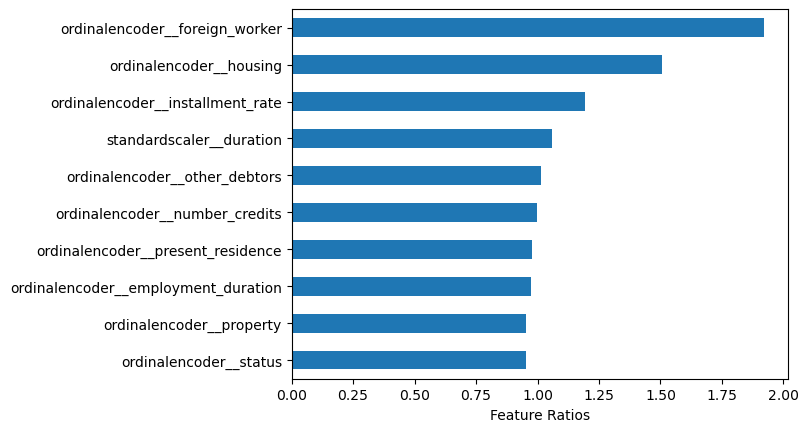

In [37]:
# Horizontal bar chart, ten largest coefficients.
feature_ratios.tail(10).plot(kind="barh")
plt.xlabel("Feature Ratios");

### Construct confusion matrix

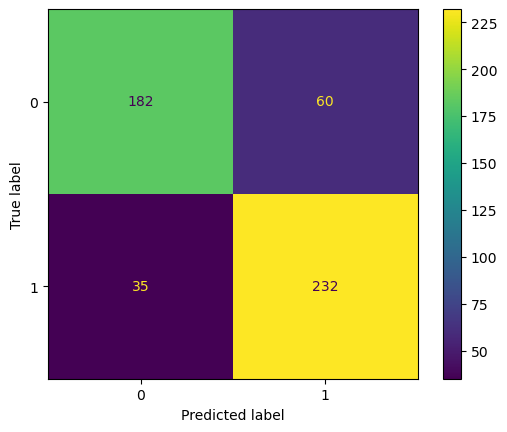

In [38]:
c_matrix = confusion_matrix(y_test, pred_test_lgr, labels=final_model.classes_)
m_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                                   display_labels=final_model.classes_)
m_display.plot()
plt.show()